The goal of this analysis is to identify the most important expenditures for student math achievement by 8th grade and examine the relationship between state level voting and educational achievement.

Achievement and enrollment data comes from NAEP (National Assessment of Educational Progress).

https://nces.ed.gov/ccd/stnfis.asp https://www.nationsreportcard.gov/ndecore/xplore/NDE

Expenditure data comes from the US Census Bureau.

https://www.census.gov/programs-surveys/school-finances/data/tables.html

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn import preprocessing


df = pd.read_csv("/content/drive/MyDrive/Data Science/states_all_imputed.csv")
# Take a look at the general data
#df.info()
df = df.sort_values(['YEAR','STATE'])

# # allows viewing the entire dataframe

# pd.set_option('max_columns', None)
# pd.set_option('max_rows', None)
# df

Unnamed: 0                PRIMARY_KEY                 STATE  YEAR  \
1275        1275               1986_ALABAMA               ALABAMA  1986   
1282        1282                1986_ALASKA                ALASKA  1986   
1289        1289               1986_ARIZONA               ARIZONA  1986   
1296        1296              1986_ARKANSAS              ARKANSAS  1986   
1303        1303            1986_CALIFORNIA            CALIFORNIA  1986   
1310        1310              1986_COLORADO              COLORADO  1986   
1317        1317           1986_CONNECTICUT           CONNECTICUT  1986   
1324        1324              1986_DELAWARE              DELAWARE  1986   
1331        1331  1986_DISTRICT_OF_COLUMBIA  DISTRICT_OF_COLUMBIA  1986   
1338        1338               1986_FLORIDA               FLORIDA  1986   
1345        1345               1986_GEORGIA               GEORGIA  1986   
1352        1352                1986_HAWAII                HAWAII  1986   
1359        1359                 1986_IDAHO                 IDAHO  1986   
1366        1366              1986_ILLINOIS              ILLINOIS  1986   
1373        1373               1986_INDIANA               INDIANA  1986   
1380        1380                  1986_IOWA                  IOWA  1986   
1387        1387                1986_KANSAS                KANSAS  1986   
1394        1394              1986_KENTUCKY              KENTUCKY  1986   
1401        1401             1986_LOUISIANA             LOUISIANA  1986   
1408        1408                 1986_MAINE                 MAINE  1986   
1415        1415              1986_MARYLAND              MARYLAND  1986   
1422        1422         1986_MASSACHUSETTS         MASSACHUSETTS  1986   
1429        1429              1986_MICHIGAN              MICHIGAN  1986   
1436        1436             1986_MINNESOTA             MINNESOTA  1986   
1443        1443           1986_MISSISSIPPI           MISSISSIPPI  1986   
1450        1450              1986_MISSOURI              MISSOURI  1986   
1457        1457               1986_MONTANA               MONTANA  1986   
1464        1464              1986_NEBRASKA              NEBRASKA  1986   
1471        1471                1986_NEVADA                NEVADA  1986   
1478        1478         1986_NEW_HAMPSHIRE         NEW_HAMPSHIRE  1986   
1485        1485            1986_NEW_JERSEY            NEW_JERSEY  1986   
1492        1492            1986_NEW_MEXICO            NEW_MEXICO  1986   
1499        1499              1986_NEW_YORK              NEW_YORK  1986   
1506        1506        1986_NORTH_CAROLINA        NORTH_CAROLINA  1986   
1513        1513          1986_NORTH_DAKOTA          NORTH_DAKOTA  1986   
1520        1520                  1986_OHIO                  OHIO  1986   
1527        1527              1986_OKLAHOMA              OKLAHOMA  1986   
1534        1534                1986_OREGON                OREGON  1986   
1541        1541          1986_PENNSYLVANIA          PENNSYLVANIA  1986   
1548        1548          1986_RHODE_ISLAND          RHODE_ISLAND  1986   
1555        1555        1986_SOUTH_CAROLINA        SOUTH_CAROLINA  1986   
1562        1562          1986_SOUTH_DAKOTA          SOUTH_DAKOTA  1986   
1569        1569             1986_TENNESSEE             TENNESSEE  1986   
1576        1576                 1986_TEXAS                 TEXAS  1986   
1583        1583                  1986_UTAH                  UTAH  1986   
1590        1590               1986_VERMONT               VERMONT  1986   
1597        1597              1986_VIRGINIA              VIRGINIA  1986   
1604        1604            1986_WASHINGTON            WASHINGTON  1986   
1611        1611         1986_WEST_VIRGINIA         WEST_VIRGINIA  1986   
1618        1618             1986_WISCONSIN             WISCONSIN  1986   
1625        1625               1986_WYOMING               WYOMING  1986   
1276        1276               1987_ALABAMA               ALABAMA  1987   
1283        1283               

In [ ]:
df = df.drop(columns=['GRADES_PK_G','GRADES_KG_G','GRADES_4_G','GRADES_8_G','GRADES_12_G','GRADES_1_8_G','GRADES_9_12_G','GRADES_ALL_G','SUPPORT_SERVICES_EXPENDITURE','TOTAL_REVENUE','FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE'])
df.head()

Unnamed: 0      PRIMARY_KEY       STATE  YEAR     ENROLL  \
1275        1275     1986_ALABAMA     ALABAMA  1986   734652.0   
1282        1282      1986_ALASKA      ALASKA  1986   132477.0   
1289        1289     1986_ARIZONA     ARIZONA  1986   938274.0   
1296        1296    1986_ARKANSAS    ARKANSAS  1986   479177.0   
1303        1303  1986_CALIFORNIA  CALIFORNIA  1986  6217031.0   

      AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  AVG_READING_4_SCORE  \
1275             231.0             267.0                217.0   
1282             236.0             280.0                213.0   
1289             238.0             283.0                215.0   
1296             235.0             275.0                218.0   
1303             232.0             275.0                213.0   

      AVG_READING_8_SCORE  fed_rev_pp  state_rev_pp  local_rev_pp  \
1275                259.0    1.085726      5.577737      3.543501   
1282                260.0    2.319799     12.180794      4.330533   
1289                263.0    1.237280      3.667080      4.158060   
1296                259.0    1.238908      8.603036      1.429499   
1303                259.0    1.239994      8.187922      4.922545   

      remaining_rev_pp  instruct_ex_pp  other_ex_pp  capital_ex_pp  \
1275               0.0        5.261611     0.820051       0.831336   
1282               0.0        9.448719     0.690958       1.925172   
1289               0.0        4.126993     0.522919       0.563475   
1296               0.0        5.547539     0.605029       1.081398   
1303               0.0        6.850098     0.642743       1.091541   

      support_services_ex_pp  remaining_ex_pp  
1275                3.320802              0.0  
1282                7.426776              0.0  
1289                3.104824              0.0  
1296                3.762219              0.0  
1303                4.191393              0.0

Income Data from US Census Bureau

https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-households.html

In [ ]:
dfMedian = pd.read_csv("/content/drive/MyDrive/Data Science/Median Household Income by State - Final.csv")
# Take a look at the general data
#df.info()
dfMedian = dfMedian.rename(columns={"State": "STATE", "Year":"YEAR", "Median income":"MEDIAN_INCOME"})
dfMedian = dfMedian.drop(columns={"State1"})
dfMedian = dfMedian.replace(' ', '_', regex=True)
dfMedian = dfMedian.drop(dfMedian[dfMedian.YEAR == 2018].index)
dfMedian.head()

STATE  YEAR MEDIAN_INCOME Standard error
0     ALABAMA  1992        25,808          1,058
1      ALASKA  1992        41,802          1,156
2     ARIZONA  1992        29,358          1,088
3    ARKANSAS  1992        23,882          1,398
4  CALIFORNIA  1992        34,903            629

MIT Election Data and Science Lab, 2017, "U.S. President 1976–2020", https://doi.org/10.7910/DVN/42MVDX, Harvard Dataverse, V6, UNF:6:4KoNz9KgTkXy0ZBxJ9ZkOw== [fileUNF]

Accessed via https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/42MVDX

In [ ]:
dfVote = pd.read_csv("/content/drive/MyDrive/Data Science/1992-2020-president democrat.csv")
# Take a look at the general data
#df.info()
dfVote = dfVote.rename(columns={"state": "STATE", "year":"YEAR"})
dfVote = dfVote.replace(' ', '_', regex=True)
dfVote = dfVote.drop(dfVote[dfVote.YEAR == 2020].index)
dfVote = dfVote.drop([173,307,326])
dfVote = dfVote.sort_values(['YEAR','STATE'])
dfVote.tail()

YEAR          STATE state_po  state_fips  state_cen  state_ic  \
352  2016       VIRGINIA       VA          51         54        40   
353  2016     WASHINGTON       WA          53         91        73   
354  2016  WEST_VIRGINIA       WV          54         55        56   
355  2016      WISCONSIN       WI          55         35        25   
356  2016        WYOMING       WY          56         83        68   

           office         candidate party_detailed  writein  candidatevotes  \
352  US_PRESIDENT  CLINTON,_HILLARY       DEMOCRAT    False         1981473   
353  US_PRESIDENT  CLINTON,_HILLARY       DEMOCRAT    False         1742718   
354  US_PRESIDENT  CLINTON,_HILLARY       DEMOCRAT    False          188794   
355  US_PRESIDENT  CLINTON,_HILLARY       DEMOCRAT    False         1382536   
356  US_PRESIDENT  CLINTON,_HILLARY       DEMOCRAT    False           55973   

     totalvotes   percent   version  notes party_simplified  
352     3982752  0.497514  20210113    NaN         DEMOCRAT  
353     3317019  0.525387  20210113    NaN         DEMOCRAT  
354      713051  0.264769  20210113    NaN         DEMOCRAT  
355     2976150  0.464538  20210113    NaN         DEMOCRAT  
356      258788  0.216289  20210113    NaN         DEMOCRAT

In [ ]:
table = table.sort_values(by=['t_stay'], ascending=False)

In [ ]:
addData('median_income',dfMedian,'MEDIAN_INCOME')

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Unnamed: 0      PRIMARY_KEY       STATE  YEAR     ENROLL  \
1275        1275     1986_ALABAMA     ALABAMA  1986   734652.0   
1282        1282      1986_ALASKA      ALASKA  1986   132477.0   
1289        1289     1986_ARIZONA     ARIZONA  1986   938274.0   
1296        1296    1986_ARKANSAS    ARKANSAS  1986   479177.0   
1303        1303  1986_CALIFORNIA  CALIFORNIA  1986  6217031.0   

      AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  AVG_READING_4_SCORE  \
1275             231.0             267.0                217.0   
1282             236.0             280.0                213.0   
1289             238.0             283.0                215.0   
1296             235.0             275.0                218.0   
1303             232.0             275.0                213.0   

      AVG_READING_8_SCORE  fed_rev_pp  state_rev_pp  local_rev_pp  \
1275                259.0    1.085726      5.577737      3.543501   
1282                260.0    2.319799     12.180794      4.330533   
1289                263.0    1.237280      3.667080      4.158060   
1296                259.0    1.238908      8.603036      1.429499   
1303                259.0    1.239994      8.187922      4.922545   

      remaining_rev_pp  instruct_ex_pp  other_ex_pp  capital_ex_pp  \
1275               0.0        5.261611     0.820051       0.831336   
1282               0.0        9.448719     0.690958       1.925172   
1289               0.0        4.126993     0.522919       0.563475   
1296               0.0        5.547539     0.605029       1.081398   
1303               0.0        6.850098     0.642743       1.091541   

      support_services_ex_pp  remaining_ex_pp median_income  
1275                3.320802              0.0           NaN  
1282                7.426776              0.0           NaN  
1289                3.104824              0.0           NaN  
1296                3.762219              0.0           NaN  
1303                4.191393              0.0           NaN

In [ ]:
df.tail()

Unnamed: 0         PRIMARY_KEY          STATE  YEAR     ENROLL  \
1710        1710       2019_VIRGINIA       VIRGINIA  2019  1283493.0   
1711        1711     2019_WASHINGTON     WASHINGTON  2019  1083973.0   
1712        1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019   276764.0   
1713        1713      2019_WISCONSIN      WISCONSIN  2019   857736.0   
1714        1714        2019_WYOMING        WYOMING  2019    94511.0   

      AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  AVG_READING_4_SCORE  \
1710             247.0             287.0                224.0   
1711             240.0             286.0                220.0   
1712             231.0             272.0                213.0   
1713             242.0             289.0                220.0   
1714             246.0             286.0                227.0   

      AVG_READING_8_SCORE  fed_rev_pp  state_rev_pp  local_rev_pp  \
1710                262.0    0.824427      4.906600      6.936961   
1711                266.0    1.012649      8.497630      4.294829   
1712                256.0    1.293767      6.731591      4.229051   
1713                267.0    0.912414      6.979727      5.745466   
1714                265.0    1.301563     12.441927      7.890701   

      remaining_rev_pp  instruct_ex_pp  other_ex_pp  capital_ex_pp  \
1710               0.0        6.968962     0.501371       0.904814   
1711               0.0        6.538322     0.532860       2.033315   
1712               0.0        6.519038     0.854472       0.655403   
1713               0.0        6.715840     0.592272       1.262450   
1714               0.0        9.750124     0.566812       4.806869   

      support_services_ex_pp  remaining_ex_pp median_income  
1710                4.023940              0.0        81,313  
1711                4.524628              0.0        82,454  
1712                4.072983              0.0        53,706  
1713                4.303701              0.0        67,355  
1714                6.197162              0.0        65,134

In [ ]:
dfVote.iloc[320:330]

YEAR          STATE state_po  state_fips  state_cen  state_ic  \
322  2016       KENTUCKY       KY          21         61        51   
323  2016      LOUISIANA       LA          22         72        45   
324  2016          MAINE       ME          23         11         2   
325  2016       MARYLAND       MD          24         52        52   
327  2016  MASSACHUSETTS       MA          25         14         3   
328  2016       MICHIGAN       MI          26         34        23   
329  2016      MINNESOTA       MN          27         41        33   
330  2016    MISSISSIPPI       MS          28         64        46   
331  2016       MISSOURI       MO          29         43        34   
332  2016        MONTANA       MT          30         81        64   

           office         candidate party_detailed  writein  candidatevotes  \
322  US_PRESIDENT  CLINTON,_HILLARY       DEMOCRAT    False          628854   
323  US_PRESIDENT  CLINTON,_HILLARY       DEMOCRAT    False          780154   
324  US_PRESIDENT  CLINTON,_HILLARY       DEMOCRAT    False          357735   
325  US_PRESIDENT  CLINTON,_HILLARY       DEMOCRAT    False         1677928   
327  US_PRESIDENT  CLINTON,_HILLARY       DEMOCRAT    False         1995196   
328  US_PRESIDENT  CLINTON,_HILLARY       DEMOCRAT    False         2268839   
329  US_PRESIDENT  CLINTON,_HILLARY       DEMOCRAT    False         1367705   
330  US_PRESIDENT  CLINTON,_HILLARY       DEMOCRAT    False          485131   
331  US_PRESIDENT  CLINTON,_HILLARY       DEMOCRAT    False         1071068   
332  US_PRESIDENT  CLINTON,_HILLARY       DEMOCRAT    False          177709   

     totalvotes   percent   version  notes party_simplified  
322     1924149  0.326822  20210113    NaN         DEMOCRAT  
323     2029032  0.384496  20210113    NaN         DEMOCRAT  
324      771892  0.463452  20210113    NaN         DEMOCRAT  
325     2781446  0.603257  20210113    NaN         DEMOCRAT  
327     3378821  0.590501  20210113    NaN         DEMOCRAT  
328     4799284  0.472745  20210113    NaN         DEMOCRAT  
329     2944782  0.464450  20210113    NaN         DEMOCRAT  
330     1209357  0.401148  20210113    NaN         DEMOCRAT  
331     2808605  0.381352  20210113    NaN         DEMOCRAT  
332      494526  0.359352  20210113    NaN         DEMOCRAT

In [ ]:
addData('percent_Dem',dfVote,'percent')

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Unnamed: 0      PRIMARY_KEY       STATE  YEAR     ENROLL  \
1275        1275     1986_ALABAMA     ALABAMA  1986   734652.0   
1282        1282      1986_ALASKA      ALASKA  1986   132477.0   
1289        1289     1986_ARIZONA     ARIZONA  1986   938274.0   
1296        1296    1986_ARKANSAS    ARKANSAS  1986   479177.0   
1303        1303  1986_CALIFORNIA  CALIFORNIA  1986  6217031.0   

      AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  AVG_READING_4_SCORE  \
1275             231.0             267.0                217.0   
1282             236.0             280.0                213.0   
1289             238.0             283.0                215.0   
1296             235.0             275.0                218.0   
1303             232.0             275.0                213.0   

      AVG_READING_8_SCORE  fed_rev_pp  state_rev_pp  local_rev_pp  \
1275                259.0    1.085726      5.577737      3.543501   
1282                260.0    2.319799     12.180794      4.330533   
1289                263.0    1.237280      3.667080      4.158060   
1296                259.0    1.238908      8.603036      1.429499   
1303                259.0    1.239994      8.187922      4.922545   

      remaining_rev_pp  instruct_ex_pp  other_ex_pp  capital_ex_pp  \
1275               0.0        5.261611     0.820051       0.831336   
1282               0.0        9.448719     0.690958       1.925172   
1289               0.0        4.126993     0.522919       0.563475   
1296               0.0        5.547539     0.605029       1.081398   
1303               0.0        6.850098     0.642743       1.091541   

      support_services_ex_pp  remaining_ex_pp median_income  percent_Dem  
1275                3.320802              0.0           NaN          NaN  
1282                7.426776              0.0           NaN          NaN  
1289                3.104824              0.0           NaN          NaN  
1296                3.762219              0.0           NaN          NaN  
1303                4.191393              0.0           NaN          NaN

In [ ]:
df.iloc[1600:1610]

Unnamed: 0         PRIMARY_KEY          STATE  YEAR     ENROLL  \
1266        1266      2016_TENNESSEE      TENNESSEE  2016   999265.0   
1267        1267          2016_TEXAS          TEXAS  2016  5053291.0   
1268        1268           2016_UTAH           UTAH  2016   580215.0   
1269        1269        2016_VERMONT        VERMONT  2016    87974.0   
1270        1270       2016_VIRGINIA       VIRGINIA  2016  1283493.0   
1271        1271     2016_WASHINGTON     WASHINGTON  2016  1083973.0   
1272        1272  2016_WEST_VIRGINIA  WEST_VIRGINIA  2016   276764.0   
1273        1273      2016_WISCONSIN      WISCONSIN  2016   857736.0   
1274        1274        2016_WYOMING        WYOMING  2016    94511.0   
1281        1281        2017_ALABAMA        ALABAMA  2017   734652.0   

      AVG_MATH_4_SCORE  AVG_MATH_8_SCORE  AVG_READING_4_SCORE  \
1266             241.0             278.0                219.0   
1267             244.0             284.0                218.0   
1268             243.0             286.0                226.0   
1269             243.0             290.0                230.0   
1270             247.0             288.0                229.0   
1271             245.0             287.0                226.0   
1272             235.0             271.0                216.0   
1273             243.0             289.0                223.0   
1274             247.0             287.0                228.0   
1281             232.0             268.0                216.0   

      AVG_READING_8_SCORE  fed_rev_pp  state_rev_pp  local_rev_pp  \
1266                265.0    1.096221      4.398990      4.097170   
1267                261.0    1.178113      4.354449      6.001338   
1268                269.0    0.679162      4.366611      3.490585   
1269                274.0    1.271864     18.352218      4.387160   
1270                267.0    0.824427      4.906600      6.936961   
1271                267.0    1.012649      8.497630      4.294829   
1272                260.0    1.293767      6.731591      4.229051   
1273                270.0    0.912414      6.979727      5.745466   
1274                269.0    1.301563     12.441927      7.890701   
1281                258.0    1.085726      5.577737      3.543501   

      remaining_rev_pp  instruct_ex_pp  other_ex_pp  capital_ex_pp  \
1266               0.0        5.405785     0.570030       0.554404   
1267               0.0        5.513674     0.565083       1.648948   
1268               0.0        4.466620     0.494203       1.220217   
1269               0.0       11.517141     0.639837       0.487769   
1270               0.0        6.968962     0.501371       0.904814   
1271               0.0        6.538322     0.532860       2.033315   
1272               0.0        6.519038     0.854472       0.655403   
1273               0.0        6.715840     0.592272       1.262450   
1274               0.0        9.750124     0.566812       4.806869   
1281               0.0        5.261611     0.820051       0.831336   

      support_services_ex_pp  remaining_ex_pp median_income  percent_Dem  
1266                2.917337              0.0        51,344     0.347163  
1267                3.001808              1.0        58,146     0.432353  
1268                2.097671              0.0        67,481     0.274613  
1269                6.628981              4.0        60,837     0.557227  
1270                4.023940              0.0        66,451     0.497514  
1271                4.524628              0.0        70,310     0.525387  
1272                4.072983              0.0        44,354     0.264769  
1273                4.303701              0.0        59,817     0.464538  
1274                6.197162              0.0        57,829     0.216289  
1281                3.320802              0.0        51,113          NaN

**From here:**

1) Impute voting data
2) Mean center and standardize
3) Run regression
4) Make pretty

In [ ]:
na = df.isna()
na = na.sum()
na

Unnamed: 0                   0
PRIMARY_KEY                  0
STATE                        0
YEAR                         0
ENROLL                       0
AVG_MATH_4_SCORE             0
AVG_MATH_8_SCORE             0
AVG_READING_4_SCORE          0
AVG_READING_8_SCORE          0
fed_rev_pp                   0
state_rev_pp                 0
local_rev_pp                 0
remaining_rev_pp             0
instruct_ex_pp               0
other_ex_pp                  0
capital_ex_pp                0
support_services_ex_pp       0
remaining_ex_pp              0
median_income              338
percent_Dem               1361
dtype: int64

In [ ]:
df = df.fillna('empty')

df = df.drop(df[df.YEAR < 1992].index)
df = df.sort_values(['STATE','YEAR'])

df.head()

Unnamed: 0   PRIMARY_KEY    STATE  YEAR    ENROLL  AVG_MATH_4_SCORE  \
0             0  1992_ALABAMA  ALABAMA  1992  727716.0             208.0   
51           51  1993_ALABAMA  ALABAMA  1993  727716.0             208.0   
102         102  1994_ALABAMA  ALABAMA  1994  730004.0             208.0   
153         153  1995_ALABAMA  ALABAMA  1995  727480.0             208.0   
204         204  1996_ALABAMA  ALABAMA  1996  735912.0             208.0   

     AVG_MATH_8_SCORE  AVG_READING_4_SCORE  AVG_READING_8_SCORE  fed_rev_pp  \
0               252.0                207.0                255.0    0.455410   
51              252.0                207.0                255.0    0.455410   
102             252.0                208.0                255.0    0.454550   
153             252.0                208.0                255.0    0.452187   
204             252.0                208.0                255.0    0.455025   

     state_rev_pp  local_rev_pp  remaining_rev_pp  instruct_ex_pp  \
0        2.376332      1.053552               0.0        2.149957   
51       2.376332      1.053552               0.0        2.149957   
102      2.535457      1.078769               0.0        2.325457   
153      2.971032      1.205688               0.0        2.545362   
204      2.906213      1.211474               0.0        2.700076   

     other_ex_pp  capital_ex_pp  support_services_ex_pp  remaining_ex_pp  \
0       0.325982       0.280614                1.091286              0.0   
51      0.325982       0.280614                1.091286              0.0   
102     0.420514       0.317133                1.132106              0.0   
153     0.449436       0.334532                1.222003              0.0   
204     0.438752       0.389583                1.270689              0.0   

    median_income percent_Dem  
0          25,808    0.408801  
51         25,082       empty  
102        27,196       empty  
153        25,991       empty  
204        30,302    0.431561

In [ ]:
df.STATE.unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'DODEA', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS',
       'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE',
       'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA',
       'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NATIONAL', 'NEBRASKA',
       'NEVADA', 'NEW_HAMPSHIRE', 'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK',
       'NORTH_CAROLINA', 'NORTH_DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'WYOMING'], dtype=object)

In [ ]:
def preserveData(column):    
      for y in df.index:
        if df[column][y] != 'empty':
          last_score = df[column][y]
        else:
          df[column][y] = last_score


preserveData('percent_Dem')

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Unnamed: 0   PRIMARY_KEY    STATE  YEAR    ENROLL  AVG_MATH_4_SCORE  \
0             0  1992_ALABAMA  ALABAMA  1992  727716.0             208.0   
51           51  1993_ALABAMA  ALABAMA  1993  727716.0             208.0   
102         102  1994_ALABAMA  ALABAMA  1994  730004.0             208.0   
153         153  1995_ALABAMA  ALABAMA  1995  727480.0             208.0   
204         204  1996_ALABAMA  ALABAMA  1996  735912.0             208.0   

     AVG_MATH_8_SCORE  AVG_READING_4_SCORE  AVG_READING_8_SCORE  fed_rev_pp  \
0               252.0                207.0                255.0    0.455410   
51              252.0                207.0                255.0    0.455410   
102             252.0                208.0                255.0    0.454550   
153             252.0                208.0                255.0    0.452187   
204             252.0                208.0                255.0    0.455025   

     state_rev_pp  local_rev_pp  remaining_rev_pp  instruct_ex_pp  \
0        2.376332      1.053552               0.0        2.149957   
51       2.376332      1.053552               0.0        2.149957   
102      2.535457      1.078769               0.0        2.325457   
153      2.971032      1.205688               0.0        2.545362   
204      2.906213      1.211474               0.0        2.700076   

     other_ex_pp  capital_ex_pp  support_services_ex_pp  remaining_ex_pp  \
0       0.325982       0.280614                1.091286              0.0   
51      0.325982       0.280614                1.091286              0.0   
102     0.420514       0.317133                1.132106              0.0   
153     0.449436       0.334532                1.222003              0.0   
204     0.438752       0.389583                1.270689              0.0   

    median_income percent_Dem  
0          25,808    0.408801  
51         25,082    0.408801  
102        27,196    0.408801  
153        25,991    0.408801  
204        30,302    0.431561

In [ ]:
preserveData('median_income')

df = df.replace(',','', regex=True)
df["median_income"] = df.median_income.astype(float)
df["percent_Dem"] = df.percent_Dem.astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407 entries, 0 to 1714
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1407 non-null   int64  
 1   PRIMARY_KEY             1407 non-null   object 
 2   STATE                   1407 non-null   object 
 3   YEAR                    1407 non-null   int64  
 4   ENROLL                  1407 non-null   float64
 5   AVG_MATH_4_SCORE        1407 non-null   float64
 6   AVG_MATH_8_SCORE        1407 non-null   float64
 7   AVG_READING_4_SCORE     1407 non-null   float64
 8   AVG_READING_8_SCORE     1407 non-null   float64
 9   fed_rev_pp              1407 non-null   float64
 10  state_rev_pp            1407 non-null   float64
 11  local_rev_pp            1407 non-null   float64
 12  remaining_rev_pp        1407 non-null   float64
 13  instruct_ex_pp          1407 non-null   float64
 14  other_ex_pp             1407 non-null   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:

#df.info()
df = df.drop(df[df.STATE == "DODEA"].index)

df.head()

Unnamed: 0   PRIMARY_KEY    STATE  YEAR    ENROLL  AVG_MATH_4_SCORE  \
0             0  1992_ALABAMA  ALABAMA  1992  727716.0             208.0   
51           51  1993_ALABAMA  ALABAMA  1993  727716.0             208.0   
102         102  1994_ALABAMA  ALABAMA  1994  730004.0             208.0   
153         153  1995_ALABAMA  ALABAMA  1995  727480.0             208.0   
204         204  1996_ALABAMA  ALABAMA  1996  735912.0             208.0   

     AVG_MATH_8_SCORE  AVG_READING_4_SCORE  AVG_READING_8_SCORE  fed_rev_pp  \
0               252.0                207.0                255.0    0.455410   
51              252.0                207.0                255.0    0.455410   
102             252.0                208.0                255.0    0.454550   
153             252.0                208.0                255.0    0.452187   
204             252.0                208.0                255.0    0.455025   

     state_rev_pp  local_rev_pp  remaining_rev_pp  instruct_ex_pp  \
0        2.376332      1.053552               0.0        2.149957   
51       2.376332      1.053552               0.0        2.149957   
102      2.535457      1.078769               0.0        2.325457   
153      2.971032      1.205688               0.0        2.545362   
204      2.906213      1.211474               0.0        2.700076   

     other_ex_pp  capital_ex_pp  support_services_ex_pp  remaining_ex_pp  \
0       0.325982       0.280614                1.091286              0.0   
51      0.325982       0.280614                1.091286              0.0   
102     0.420514       0.317133                1.132106              0.0   
153     0.449436       0.334532                1.222003              0.0   
204     0.438752       0.389583                1.270689              0.0   

     median_income  percent_Dem  
0          25808.0     0.408801  
51         25082.0     0.408801  
102        27196.0     0.408801  
153        25991.0     0.408801  
204        30302.0     0.431561

In [ ]:
# #central tendencies of target variables

df[["AVG_MATH_8_SCORE", "AVG_READING_8_SCORE"]].describe()

AVG_MATH_8_SCORE  AVG_READING_8_SCORE
count       1392.000000          1392.000000
mean         274.742816           260.970546
std           12.108779             6.737440
min          235.000000           236.000000
25%          267.750000           255.000000
50%          278.000000           261.000000
75%          284.000000           267.000000
max          301.000000           278.000000

In [ ]:
df.to_csv(r'/content/drive/MyDrive/Data Science/states_ex_income_vote.csv')

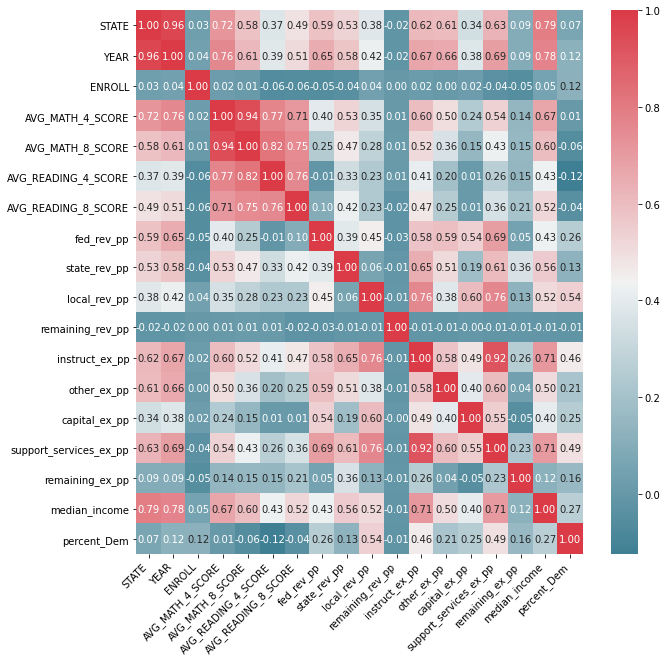

In [ ]:
# Correlation matrix
correlations = df.corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
# Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")
ax.set_xticklabels(
    labels=df.columns[2:20],
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(labels=df.columns[2:20]);
plt.show()

Improve Data Set:

1) Impute NA Data

2) Add median and household income data

3) Add Presidential and Congressional voting data

Extensions:

1) Control for state median income to determine which state is best educating relative to economic status of students.

2) Explore the extended dataset for impact of gender and race on attainment.

3) Add teacher education and experience data to set to measure impact of teacher training on student outcomes.

Adding data - https://pandas.pydata.org/docs/getting_started/intro_tutorials/08_combine_dataframes.html

In [ ]:
#manually mean center by subtracting by the mean

#create df of features for hypothesis, from full dataframe
h2 = df[['fed_rev_pp', 'state_rev_pp', 'local_rev_pp', 'remaining_rev_pp', 'instruct_ex_pp', 'other_ex_pp','capital_ex_pp','support_services_ex_pp','remaining_ex_pp','median_income']]

#center the variables
x_centered = h2 - h2.mean(axis=0)

x_centered.mean(axis=0)

fed_rev_pp               -2.099135e-15
state_rev_pp             -9.242926e-15
local_rev_pp             -1.223670e-14
remaining_rev_pp          6.066585e-23
instruct_ex_pp            8.395583e-15
other_ex_pp               3.557180e-17
capital_ex_pp            -5.123615e-16
support_services_ex_pp   -5.280578e-15
remaining_ex_pp           8.967922e-16
median_income             4.108407e-12
dtype: float64

In [ ]:
x_centered.std(axis=0)

fed_rev_pp                4.861663e-01
state_rev_pp              2.490774e+00
local_rev_pp              3.137582e+00
remaining_rev_pp          2.171996e-07
instruct_ex_pp            2.294474e+00
other_ex_pp               1.761965e-01
capital_ex_pp             7.555219e-01
support_services_ex_pp    1.378359e+00
remaining_ex_pp           4.423090e-01
median_income             1.214339e+04
dtype: float64

In [ ]:
#create df of features for hypothesis, from full dataframe
h3 = pd.DataFrame(df, columns=['AVG_MATH_8_SCORE','AVG_READING_8_SCORE','AVG_MATH_4_SCORE','AVG_READING_4_SCORE','YEAR','ENROLL','percent_Dem'])

#center the variables
x_standard = preprocessing.scale(h3, with_mean='False', with_std='True')

#convert back into a Pandas dataframe and add column names
x_standard_df = pd.DataFrame(x_standard, columns=h3.columns)

In [ ]:
x_standard_df.mean(axis=0)

AVG_MATH_8_SCORE       8.313114e-16
AVG_READING_8_SCORE   -2.069784e-15
AVG_MATH_4_SCORE      -1.735521e-16
AVG_READING_4_SCORE    1.524642e-15
YEAR                  -3.055347e-15
ENROLL                -7.656711e-17
percent_Dem           -1.773805e-16
dtype: float64

In [ ]:
x_standard_df.std(axis=0)

AVG_MATH_8_SCORE       1.000359
AVG_READING_8_SCORE    1.000359
AVG_MATH_4_SCORE       1.000359
AVG_READING_4_SCORE    1.000359
YEAR                   1.000359
ENROLL                 1.000359
percent_Dem            1.000359
dtype: float64

In [ ]:
X_processed = pd.concat([x_standard_df, x_centered], axis=1)
X_processed.head()

AVG_MATH_8_SCORE  AVG_READING_8_SCORE  AVG_MATH_4_SCORE  \
0         -1.878884            -0.886493          -1.78917   
1         -1.878884            -0.886493          -1.78917   
2         -1.878884            -0.886493          -1.78917   
3         -1.878884            -0.886493          -1.78917   
4         -1.878884            -0.886493          -1.78917   

   AVG_READING_4_SCORE      YEAR    ENROLL  percent_Dem  fed_rev_pp  \
0            -1.263424 -1.659796 -0.175208    -0.549202   -0.437111   
1            -1.263424 -1.532520 -0.175208    -0.549202   -0.437111   
2            -1.141513 -1.405245 -0.173022    -0.549202   -0.437111   
3            -1.141513 -1.277969 -0.175433    -0.549202   -0.437111   
4            -1.141513 -1.150693 -0.167377    -0.334580   -0.437111   

   state_rev_pp  local_rev_pp  remaining_rev_pp  instruct_ex_pp  other_ex_pp  \
0     -2.495179     -3.380392     -5.821561e-09       -3.143601    -0.147701   
1     -2.495179     -3.380392     -5.821561e-09       -3.143601    -0.147701   
2     -2.495179     -3.380392     -5.821561e-09       -3.143601    -0.147701   
3     -2.495179     -3.380392     -5.821561e-09       -3.143601    -0.147701   
4     -2.495179     -3.380392     -5.821561e-09       -3.143601    -0.147701   

   capital_ex_pp  support_services_ex_pp  remaining_ex_pp  median_income  
0      -0.691158                 -1.9631        -0.088362  -20576.876437  
1      -0.691158                 -1.9631        -0.088362   -4582.876437  
2      -0.691158                 -1.9631        -0.088362  -17026.876437  
3      -0.691158                 -1.9631        -0.088362  -22502.876437  
4      -0.691158                 -1.9631        -0.088362  -11481.876437

In [ ]:
X_processed.to_csv(r'/content/drive/MyDrive/Data Science/ed_data_centered_standardized.csv')

In [ ]:
X_processed = X_processed.dropna()

X_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1291 entries, 0 to 1386
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AVG_MATH_8_SCORE        1291 non-null   float64
 1   AVG_READING_8_SCORE     1291 non-null   float64
 2   AVG_MATH_4_SCORE        1291 non-null   float64
 3   AVG_READING_4_SCORE     1291 non-null   float64
 4   YEAR                    1291 non-null   float64
 5   ENROLL                  1291 non-null   float64
 6   percent_Dem             1291 non-null   float64
 7   fed_rev_pp              1291 non-null   float64
 8   state_rev_pp            1291 non-null   float64
 9   local_rev_pp            1291 non-null   float64
 10  remaining_rev_pp        1291 non-null   float64
 11  instruct_ex_pp          1291 non-null   float64
 12  other_ex_pp             1291 non-null   float64
 13  capital_ex_pp           1291 non-null   float64
 14  support_services_ex_pp  1291 non-null   

In [ ]:
y_math = X_processed['AVG_MATH_8_SCORE']
y_read = X_processed['AVG_READING_8_SCORE']

X = X_processed.drop(['AVG_READING_8_SCORE','AVG_MATH_8_SCORE','AVG_MATH_4_SCORE','AVG_READING_4_SCORE','fed_rev_pp',	'state_rev_pp','local_rev_pp',	'remaining_rev_pp'], axis=1)


In [ ]:
na = X.isna()
na = na.sum()
na

YEAR                      0
ENROLL                    0
percent_Dem               0
instruct_ex_pp            0
other_ex_pp               0
capital_ex_pp             0
support_services_ex_pp    0
remaining_ex_pp           0
median_income             0
dtype: int64

In [ ]:
# # allows viewing the entire dataframe

# pd.set_option('max_columns', None)
# pd.set_option('max_rows', None)
# X

YEAR    ENROLL  percent_Dem  instruct_ex_pp  other_ex_pp  \
0    -1.659796 -0.175208    -0.549202       -3.143601    -0.147701   
1    -1.532520 -0.175208    -0.549202       -3.143601    -0.147701   
2    -1.405245 -0.173022    -0.549202       -3.143601    -0.147701   
3    -1.277969 -0.175433    -0.549202       -3.143601    -0.147701   
4    -1.150693 -0.167377    -0.334580       -3.143601    -0.147701   
5    -1.023417 -0.165969    -0.334580       -3.143601    -0.147701   
6    -0.896142 -0.164120    -0.334580       -3.143601    -0.147701   
7    -0.768866 -0.165727    -0.334580       -3.143601    -0.147701   
8    -0.641590 -0.172850    -0.484473       -3.143601    -0.147701   
9    -0.514315 -0.174428    -0.484473       -3.143601    -0.147701   
10   -0.387039 -0.176497    -0.484473       -3.143601    -0.147701   
11   -0.259763 -0.175032    -0.484473       -3.143601    -0.147701   
12   -0.132487 -0.172626    -0.929753       -3.143601    -0.147701   
13   -0.005212 -0.173654    -0.929753       -3.143601    -0.147701   
14    0.122064 -0.160352    -0.929753       -3.143601    -0.147701   
15    0.249340 -0.160344    -0.929753       -3.143601    -0.147701   
16    0.376615 -0.160682    -0.750963       -3.143601    -0.147701   
17    0.503891 -0.158056    -0.750963       -3.143601    -0.147701   
18    0.631167 -0.154978    -0.750963       -3.143601    -0.147701   
19    0.758443 -0.156847    -0.750963       -3.143601    -0.147701   
20    0.885718 -0.159056    -0.786928       -3.143601    -0.147701   
21    1.012994 -0.159126    -0.786928       -3.143601    -0.147701   
22    1.140270 -0.163394    -0.786928       -3.143601    -0.147701   
23    1.267545 -0.168273    -0.786928       -3.143601    -0.147701   
24    1.394821 -0.168581    -1.164219       -3.143601    -0.147701   
25    1.522097 -0.168581    -1.164219       -3.143601    -0.147701   
26    1.776648 -0.168581    -1.164219       -3.143601    -0.147701   
27   -1.659796 -0.175208    -1.548087       -3.143601    -0.147701   
28   -1.532520 -0.754741    -1.548087       -3.143601    -0.147701   
29   -1.405245 -0.752150    -1.548087       -3.143601    -0.147701   
30   -1.277969 -0.750666    -1.548087       -3.143601    -0.147701   
31   -1.150693 -0.749932    -1.267081       -3.143601    -0.147701   
32   -1.023417 -0.748065    -1.267081       -3.143601    -0.147701   
33   -0.896142 -0.745686    -1.267081       -3.143601    -0.147701   
34   -0.768866 -0.742939    -1.267081       -3.143601    -0.147701   
35   -0.641590 -0.743595    -1.795218       -3.143601    -0.147701   
36   -0.514315 -0.744394    -1.795218       -3.143601    -0.147701   
37   -0.387039 -0.743415    -1.795218       -3.143601    -0.147701   
38   -0.259763 -0.743135    -1.795218       -3.143601    -0.147701   
39   -0.132487 -0.743278    -1.054936       -3.143601    -0.147701   
40   -0.005212 -0.743837    -1.054936       -3.143601    -0.147701   
41    0.122064 -0.743527    -1.054936       -3.143601    -0.147701   
42    0.249340 -0.744192    -1.054936       -3.143601    -0.147701   
43    0.376615 -0.745695    -0.831216       -3.143601    -0.147701   
44    0.503891 -0.746065    -0.831216       -3.143601    -0.147701   
45    0.631167 -0.745082    -0.831216       -3.143601    -0.147701   
46    0.758443 -0.744663    -0.831216       -3.143601    -0.147701   
47    0.885718 -0.745554    -0.555558       -3.143601    -0.147701   
48    1.012994 -0.745248    -0.555558       -3.143601    -0.147701   
49    1.140270 -0.745776    -0.555558       -3.143601    -0.147701   
50    1.267545 -0.745569    -0.555558       -3.143601    -0.147701   
51    1.394821 -0.743924    -0.957432       -3.143601    -0.147701   
52    1.522097 -0.743924    -0.957432       -1.208602    -0.174143   
53    1.776648 -0.743924    -0.957432       -2.958949    -0.231063   
54   -1.659796 -0.175208    -0.960301       -2.780037    -0.253356   
55   -1.532520 -0.224336    -0.960301       -2.314654    -0.160119   
56   -1.405245 -0.19

In [ ]:

X3 = sm.add_constant(X)
est3 = sm.OLS(y_math, X3)
est4 = est3.fit()
print(est4.summary())

                            OLS Regression Results                            
Dep. Variable:       AVG_MATH_8_SCORE   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     96.65
Date:                Sun, 02 May 2021   Prob (F-statistic):          1.73e-137
Time:                        18:28:44   Log-Likelihood:                -1496.5
No. Observations:                1291   AIC:                             3013.
Df Residuals:                    1281   BIC:                             3065.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
#running regression with just median income
data3 = X.drop(['instruct_ex_pp','other_ex_pp','capital_ex_pp','support_services_ex_pp','remaining_ex_pp'],axis=1)

X4 = sm.add_constant(data3)
est5 = sm.OLS(y_math, X4)
est6 = est5.fit()
print(est6.summary())

                            OLS Regression Results                            
Dep. Variable:       AVG_MATH_8_SCORE   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     213.9
Date:                Sun, 02 May 2021   Prob (F-statistic):          9.73e-141
Time:                        18:31:06   Log-Likelihood:                -1501.7
No. Observations:                1291   AIC:                             3013.
Df Residuals:                    1286   BIC:                             3039.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0060      0.022      0.277

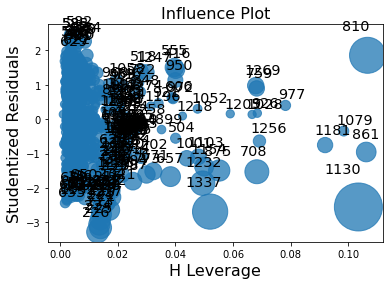

In [ ]:
sm.graphics.influence_plot(est4)
plt.show()

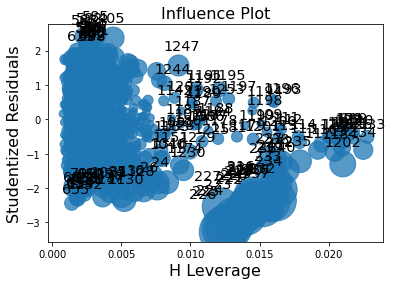

In [ ]:
sm.graphics.influence_plot(est6)
plt.show()

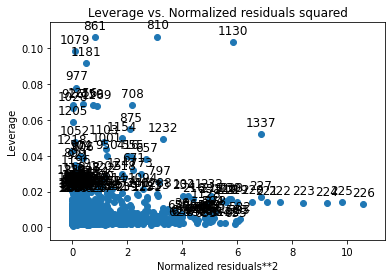

In [ ]:
sm.graphics.plot_leverage_resid2(est4)
plt.show()

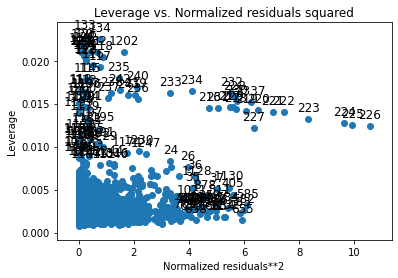

In [ ]:
sm.graphics.plot_leverage_resid2(est6)
plt.show()

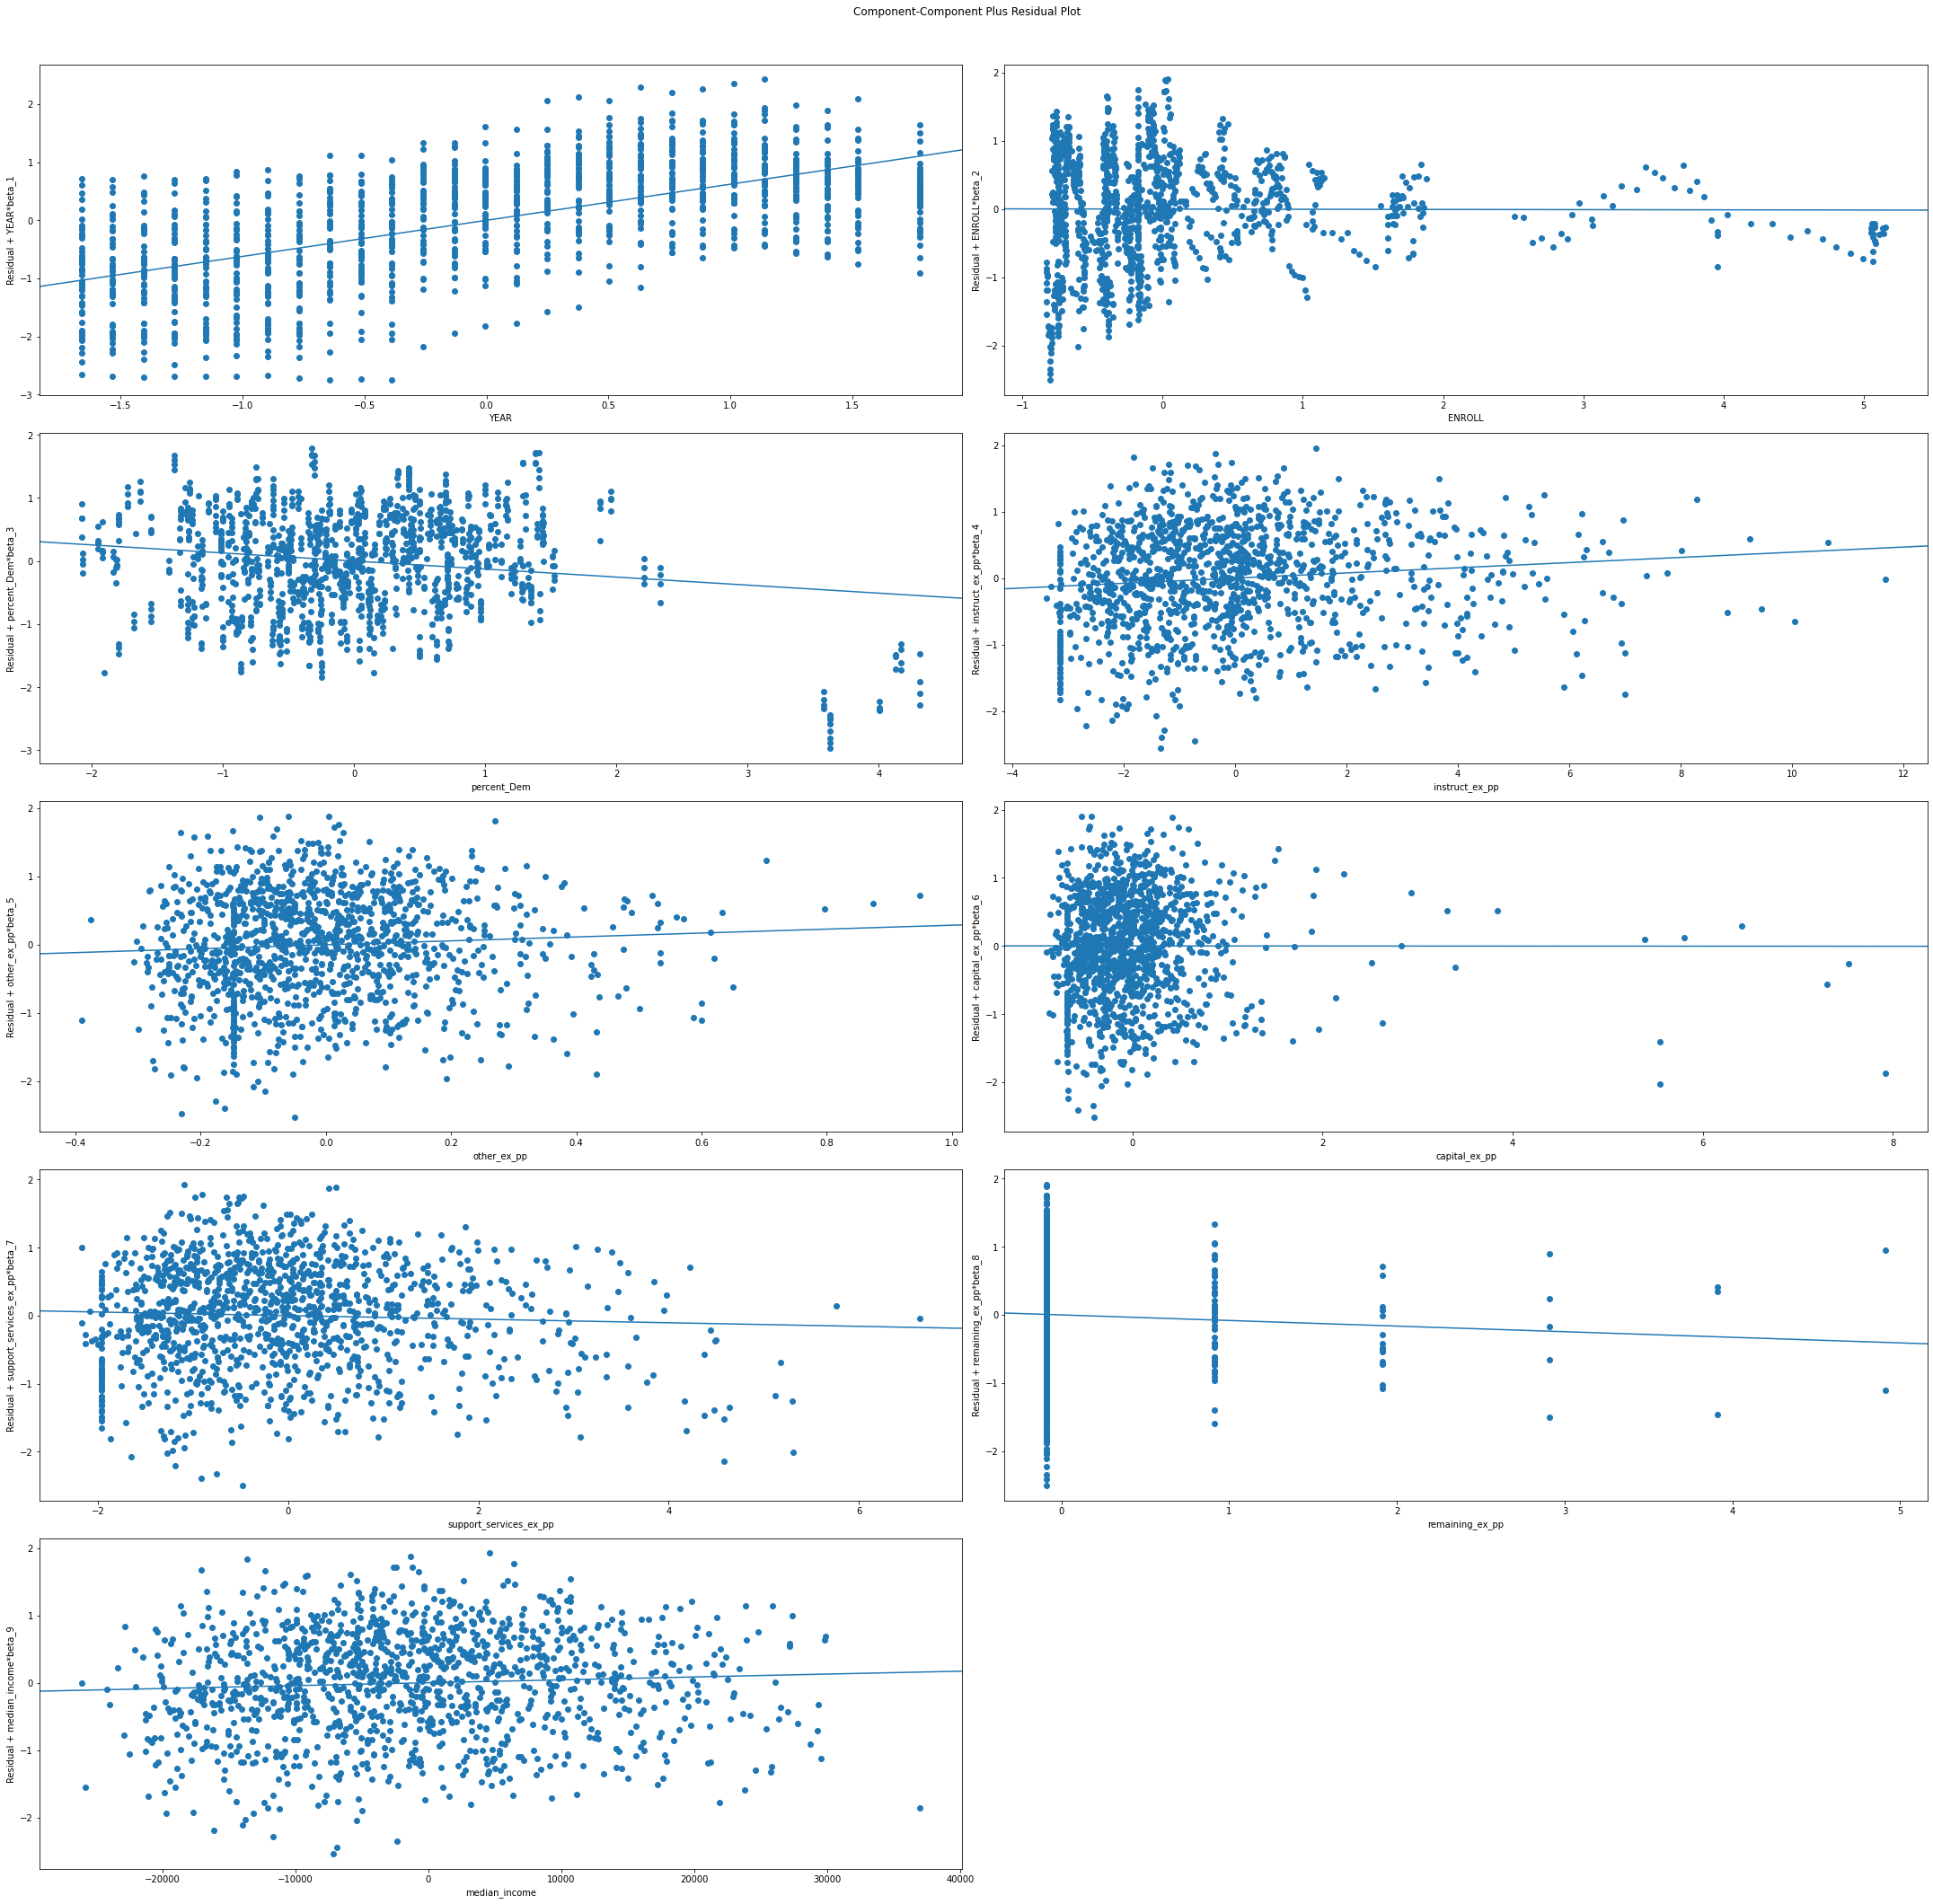

In [ ]:
fig = plt.figure(figsize=(30,30))
sm.graphics.plot_ccpr_grid(est4, fig=fig)
plt.show()

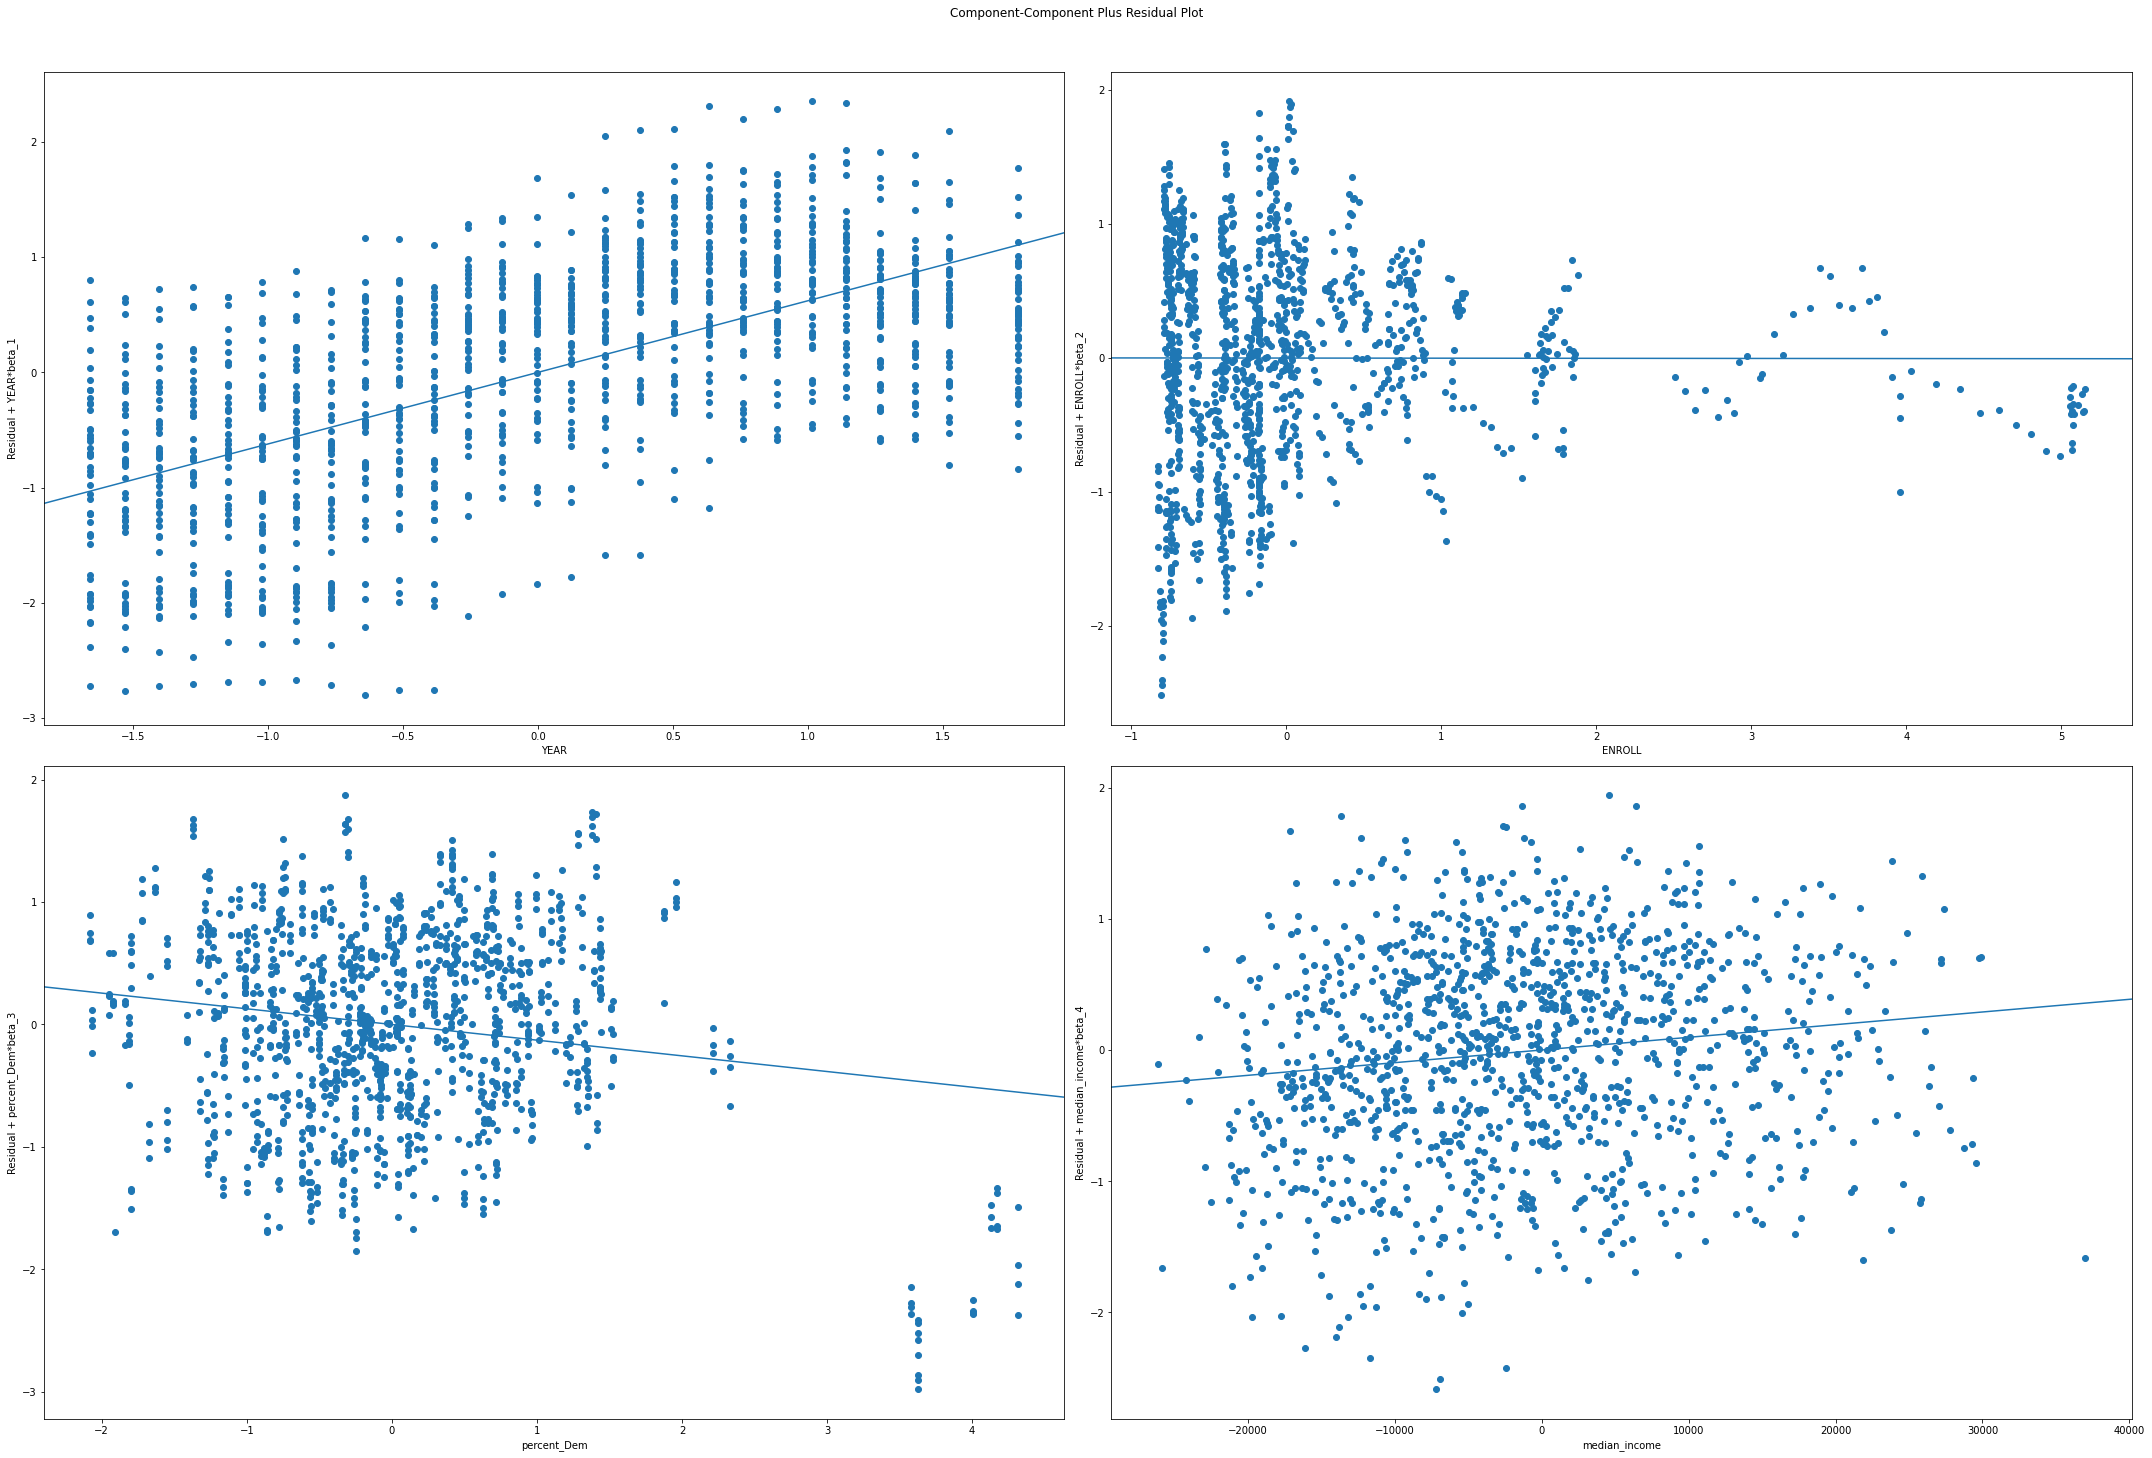

In [ ]:
fig = plt.figure(figsize=(30,30))
sm.graphics.plot_ccpr_grid(est6, fig=fig)
plt.show()

Shit to do:

1) What's going on with those outliers in voting?
2) Heterogeneous mixing with state level data, would be better at county?
